Reproduce Figure 2.12. Bayesian inference for the mean $\mu$ of a single Gaussian.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
np.random.seed(42)

In [3]:
var = 0.1  # assumed that the variance is known
var_0 = 0.1  # prior variance

mu_0 = 0.0  # prior mean

In [4]:
xx = np.linspace(-1, 1, 200)

In [5]:
likelihood = norm(loc=0.8, scale=0.1)

In [6]:
y_0 = norm(loc=0, scale=np.sqrt(var_0)) 

In [7]:
yy_0 = y_0.pdf(xx)

# N = 1

In [8]:
x_1 = np.array([1.08])  # inferred from the plot

In [9]:
def calculate_posterior(x, mu_0, var_0):
    """calculate the posterior distribution
    
    Args:
        x (np.array): observed data
        mu_0 (float): prior mean
        var_0 (float): prior variance
        
    Returns:
        mu_N (float): posterior mean
        var_N (float): posterior variance
    """
    N = len(x)
    mu_ML = np.mean(x)  # ML estimate of the mean is the sample mean (2.143)
    mu_N = (var / (N * var_0 + var)) * mu_0 + ((N * var_0) / (N * var_0 + var)) * mu_ML  # (2.141)
    pre_N = (1. / var_0) + (N / var)  # precision (2.142)
    var_N = 1. / pre_N  # variance is the inverse of precision
    
    return mu_N, var_N

In [10]:
mu_1, var_1 = calculate_posterior(x_1, mu_0, var_0)

In [11]:
y_1 = norm(loc=mu_1, scale=np.sqrt(var_1)) 

In [12]:
yy_1 = y_1.pdf(xx)

# N = 2

In [13]:
x_2 = np.array([1.08, 0.84])

In [14]:
mu_2, var_2 = calculate_posterior(x_2, mu_0, var_0)

In [15]:
y_2 = norm(loc=mu_2, scale=np.sqrt(var_2)) 

In [16]:
yy_2 = y_2.pdf(xx)

# N = 10

In [17]:
N = 10
x = likelihood.rvs(size=(N, ))

In [18]:
np.set_printoptions(precision=3)

In [19]:
x

array([0.85 , 0.786, 0.865, 0.952, 0.777, 0.777, 0.958, 0.877, 0.753,
       0.854])

In [20]:
mu_10, var_10 = calculate_posterior(x, mu_0, var_0)

In [21]:
y_10 = norm(loc=mu_10, scale=np.sqrt(var_10)) 

In [22]:
yy_10 = y_10.pdf(xx)

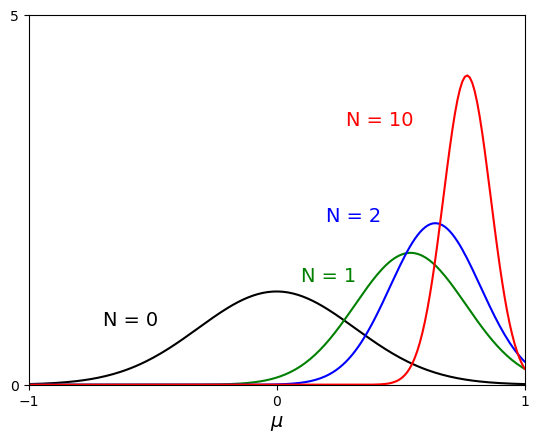

In [23]:
plt.plot(xx, yy_0, 'k')
plt.plot(xx, yy_1, 'g')
plt.plot(xx, yy_2, 'b')
plt.plot(xx, yy_10, 'r')
plt.text(-0.7, 0.8, 'N = 0', fontsize=14,  color='k')
plt.text(0.1, 1.4, 'N = 1', fontsize=14,  color='g')
plt.text(0.2, 2.2, 'N = 2', fontsize=14,  color='b')
plt.text(0.28, 3.5, 'N = 10', fontsize=14,  color='r')
plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.xticks([-1, 0, 1])
plt.yticks([0, 5])
plt.xlabel(r'$\mu$', fontsize=14)
plt.show()